In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
import tensorflow as tf
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 

# Load Data

In [2]:
tumor = []
healthy = []
for f in glob.iglob("C:/Users/Rida Hashmi/final year project/Dataset/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)
    
for f in glob.iglob("C:/Users/Rida Hashmi/final year project/Dataset/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)
    

In [3]:
image_directory='C:/Users/Rida Hashmi/final year project/Dataset/'
no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')

print('No Tumor: ', len(no_tumor_images))
print('Tumor: ',len(yes_tumor_images))

No Tumor:  500
Tumor:  500


In [4]:
dataset=[]
label=[]

INPUT_SIZE=64

# Visualizing Brain MRI Images

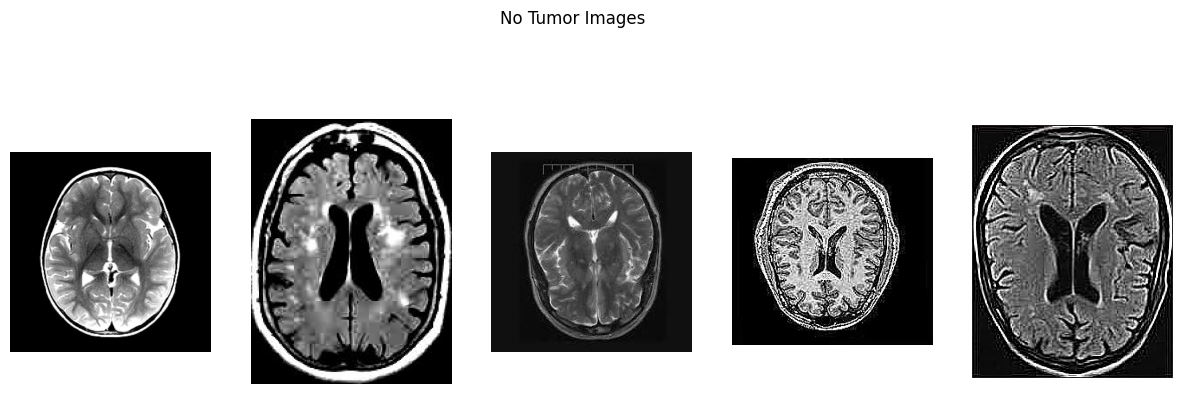

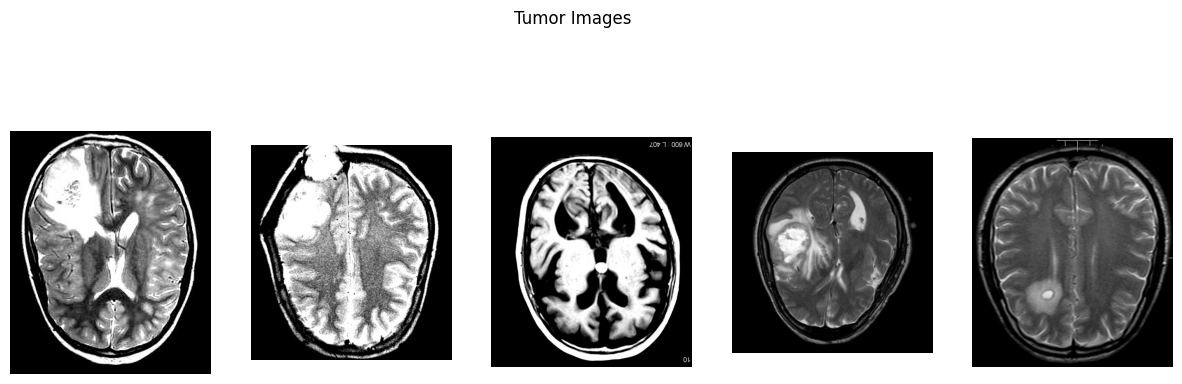

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

image_directory = 'C:/Users/Rida Hashmi/final year project/Dataset/'

# List files in directories
no_tumor_images = [os.path.join(image_directory + 'no/', file) for file in os.listdir(image_directory + 'no/')][:5]
yes_tumor_images = [os.path.join(image_directory + 'yes/', file) for file in os.listdir(image_directory + 'yes/')][:5]

# Display no tumor images
plt.figure(figsize=(15, 5))
for i, image_path in enumerate(no_tumor_images):
    plt.subplot(1, 5, i + 1)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('No Tumor Images')
plt.show()

# Display tumor images
plt.figure(figsize=(15, 5))
for i, image_path in enumerate(yes_tumor_images):
    plt.subplot(1, 5, i + 1)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('Tumor Images')
plt.show()


# Creating MRI cutom dataset class

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

class MRIDataset(tf.keras.utils.Sequence):
    def __init__(self, directory, batch_size=32, image_size=(128, 128), shuffle=True):
        self.directory = directory
        self.image_size = image_size
        self.batch_size = batch_size
        self.shuffle = shuffle

        self.no_tumor_images = [os.path.join(self.directory, 'no', img) for img in os.listdir(os.path.join(self.directory, 'no'))]
        self.yes_tumor_images = [os.path.join(self.directory, 'yes', img) for img in os.listdir(os.path.join(self.directory, 'yes'))]

        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.no_tumor_images) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.no_tumor_images)
            np.random.shuffle(self.yes_tumor_images)

    def __getitem__(self, index):
        no_tumor_batch = self.no_tumor_images[index * self.batch_size:(index + 1) * self.batch_size]
        yes_tumor_batch = self.yes_tumor_images[index * self.batch_size:(index + 1) * self.batch_size]

        images = []
        labels = []

        for img_path in no_tumor_batch:
            image = cv2.imread(img_path)
            image = cv2.resize(image, self.image_size)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = image / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(0)  # 'no' class is 0

        for img_path in yes_tumor_batch:
            image = cv2.imread(img_path)
            image = cv2.resize(image, self.image_size)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = image / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(1)  # 'yes' class is 1

        return np.array(images), np.array(labels)


# create label

In [7]:
import os
import cv2
from PIL import Image
import numpy as np

INPUT_SIZE = 128  # Set your desired input size
image_directory = 'C:/Users/Rida Hashmi/final year project/Dataset/'

no_tumor_images = os.listdir(image_directory + 'no/')
yes_tumor_images = os.listdir(image_directory + 'yes/')

dataset = []
label = []

# Read 'no' tumor images
for i, image_name in enumerate(no_tumor_images):
    file_extension = image_name.split('.')[-1]
    if file_extension.lower() in ['jpg', 'jpeg', 'png']:  # Check for common image extensions
        image = cv2.imread(os.path.join(image_directory, 'no', image_name))
        if image is not None:  # Check if the image is not 'None'
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = Image.fromarray(image)
            image = image.resize((INPUT_SIZE, INPUT_SIZE))
            dataset.append(np.array(image))
            label.append(0)
        else:
            print(f"Could not read image: {image_name}")
    else:
        print(f"File format not supported: {file_extension}")

# Read 'yes' tumor images
for i, image_name in enumerate(yes_tumor_images):
    file_extension = image_name.split('.')[-1]
    if file_extension.lower() in ['jpg', 'jpeg', 'png']:  # Check for common image extensions
        image = cv2.imread(os.path.join(image_directory, 'yes', image_name))
        if image is not None:  # Check if the image is not 'None'
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = Image.fromarray(image)
            image = image.resize((INPUT_SIZE, INPUT_SIZE))
            dataset.append(np.array(image))
            label.append(1)
        else:
            print(f"Could not read image: {image_name}")
    else:
        print(f"File format not supported: {file_extension}")

# Convert to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

print('Dataset Length:', len(dataset))
print('Label Length:', len(label))


Dataset Length: 1000
Label Length: 1000


# Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=2023)

# Normalize the Data

In [9]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

# Create a model

In [10]:
model=Sequential()

model.add(Conv2D(32, (3,3),activation='relu', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3),activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [11]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# Train The Model

In [12]:
# Access the history object after model training
history = model.fit(X_train, y_train, batch_size=32, verbose=1, epochs=100, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/100
25/25 [==============================] - 31s 868ms/step - loss: 0.5547 - accuracy: 0.7188 - val_loss: 0.4710 - val_accuracy: 0.7800
Epoch 2/100
25/25 [==============================] - 20s 805ms/step - loss: 0.4102 - accuracy: 0.8250 - val_loss: 0.3701 - val_accuracy: 0.8400
Epoch 3/100
25/25 [==============================] - 23s 928ms/step - loss: 0.3466 - accuracy: 0.8512 - val_loss: 0.3290 - val_accuracy: 0.8500
Epoch 4/100
25/25 [==============================] - 21s 826ms/step - loss: 0.2983 - accuracy: 0.8888 - val_loss: 0.2981 - val_accuracy: 0.8700
Epoch 5/100
25/25 [==============================] - 19s 761ms/step - loss: 0.2531 - accuracy: 0.9087 - val_loss: 0.2561 - val_accuracy: 0.8900
Epoch 6/100
25/25 [==============================] - 19s 764ms/step - loss: 0.2311 - accuracy: 0.9050 - val_loss: 0.2259 - val_accuracy: 0.8950
Epoch 7/100
25/25 [==============================] - 19s 745ms/step - loss: 0.2088 - accuracy: 0.9175 - val_loss: 0.1784 - val_accuracy:

25/25 [==============================] - 19s 741ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.2856 - val_accuracy: 0.9450
Epoch 58/100
25/25 [==============================] - 18s 736ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9450
Epoch 59/100
25/25 [==============================] - 18s 738ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.3161 - val_accuracy: 0.9500
Epoch 60/100
25/25 [==============================] - 18s 738ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.3349 - val_accuracy: 0.9500
Epoch 61/100
25/25 [==============================] - 19s 749ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3567 - val_accuracy: 0.9450
Epoch 62/100
25/25 [==============================] - 19s 758ms/step - loss: 7.9038e-04 - accuracy: 1.0000 - val_loss: 0.3409 - val_accuracy: 0.9550
Epoch 63/100
25/25 [==============================] - 19s 743ms/step - loss: 0.0021 - accuracy: 0.9987 - val_loss: 0.3646 - val_accuracy: 0

# Model Summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

# Evaluate a smart Model

In [15]:
# Assuming your model is already trained
# X_test and y_test should represent your test dataset and corresponding labels

# Evaluate the model on the test data
evaluation = model.evaluate(X_test, y_test)

# Print the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


7/7 [==============================] - 2s 175ms/step - loss: 0.4337 - accuracy: 0.9600
Test Loss: 0.43369466066360474
Test Accuracy: 0.9599999785423279


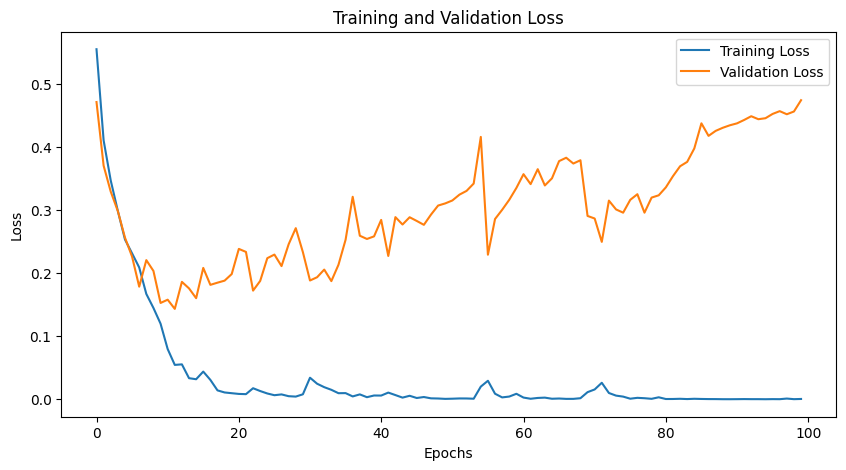

In [16]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

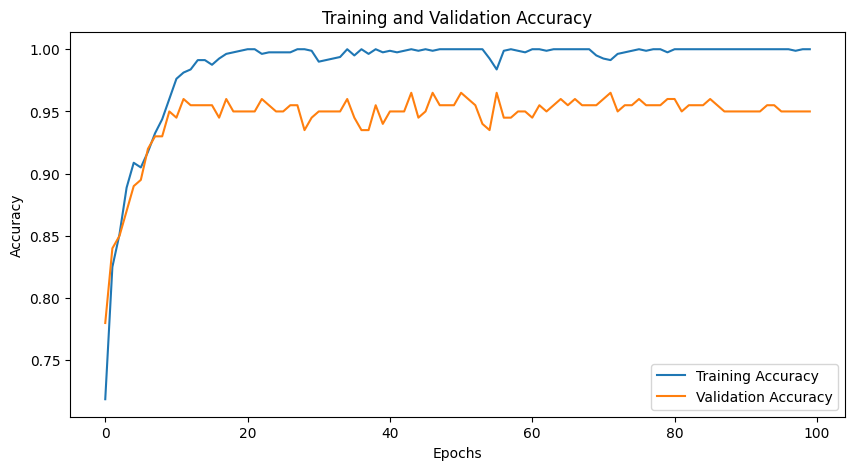

In [17]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# confusion matrix

7/7 [==============================] - 2s 209ms/step


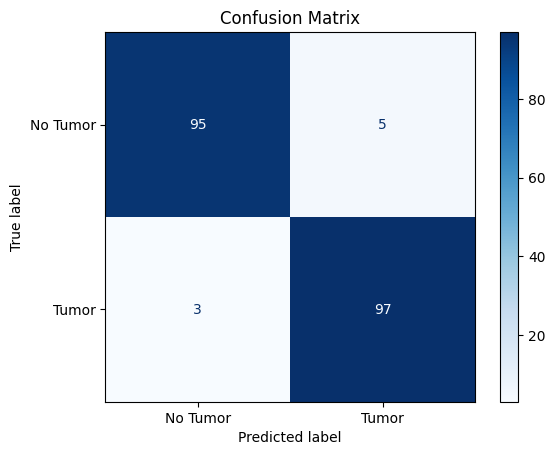

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have a test set X_test and y_test, and your model is loaded and ready

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
labels = ['No Tumor', 'Tumor']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Save the Model

In [19]:
model.save('BrainTumorDetection.h5')

C:\Users\Rida Hashmi\.conda\envs\tensorflow1\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load The Model

In [20]:
# from tensorflow.keras.models import load_model

# Load your model here (replace 'path_to_your_model.h5' with the path to your actual model)
loaded_model = load_model('BrainTumorDetection.h5')

# Make Prediction on New Data

1/1 [==============================] - 0s 180ms/step


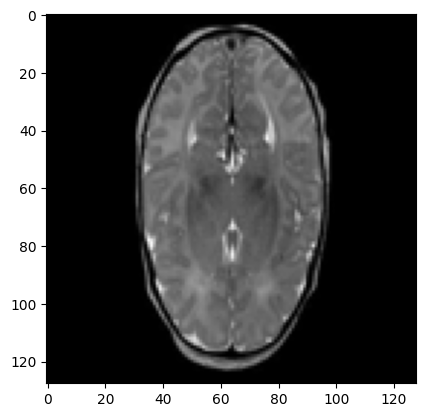

No Tumor


In [21]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def make_prediction(model, img):
    input_img = np.expand_dims(img, axis=0)
    res = (model.predict(input_img) > 0.5).astype("int32")
    return res[0][0]  # returning the predicted value

def show_result(img_path, model):
    image = cv2.imread(img_path)

    if image is not None:
        img = Image.fromarray(image)
        img = img.resize((128, 128))  # Ensure the resizing matches the input size your model expects
        img = np.array(img)

        pred = make_prediction(model, img)

        plt.imshow(img)
        plt.show()

        if pred == 1:
            print("Tumor Detected")
        else:
            print("No Tumor")
    else:
        print("Unable to read the image.")

# Define your image directory
image_directory = 'C:/Users/Rida Hashmi/final year project/file pred/'  # Ensure the path ends with a forward slash

# Call the function with the correct image path
show_result(image_directory + 'no15.jpg', loaded_model)




# App Code

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from tkinter import messagebox
from tkinter import Canvas
from PIL import Image, ImageTk, ImageDraw

# Load your model
model = tf.keras.models.load_model('BrainTumorDetection.h5')

class_names = ['tumor', 'No tumor']  # Replace with your actual class names
# Define the upload_file function
def upload_file(frame, img_label):
    f_types = [('Jpg Files', '*.jpg')]
    filename = filedialog.askopenfilename(filetypes=f_types)

    if filename:
        img = Image.open(filename)
        img = img.resize((225, 225))  # Resize the image to 225x225
        img_tk = ImageTk.PhotoImage(img)

        img_label.config(image=img_tk)
        img_label.image = img_tk

# Define the detect_tumor function to handle both image upload and tumor detection
def detect_tumor(frame, img_label, result_label):
    # Image upload
    f_types = [('Jpg Files', '*.jpg')]
    filename = filedialog.askopenfilename(filetypes=f_types)

    if filename:
        img = Image.open(filename)
        img = img.resize((128, 128))  # Resize the image to 128x128
        img_tk = ImageTk.PhotoImage(img)

        img_label.config(image=img_tk)
        img_label.image = img_tk

        result_label.config(text="Prediction: ")  # Clear previous prediction result

        # Tumor detection
        img_array = np.array(img) / 255.0  # Normalize pixel values to be between 0 and 1
        prediction = model.predict(np.expand_dims(img_array, axis=0))[0]
        tumor_prob = prediction[0]

        # Display the result in the result_label
        if tumor_prob > 0.5:
            result_label.config(text="Prediction: Tumor Detected")
        else:
            result_label.config(text="Prediction: No Tumor Detected")
            
            
        
# Define the highlight_text function
def highlight_text(text):
    return text
    
def open_about_us_window():
    about_us_window = tk.Toplevel(root)
    about_us_window.title("About Us")
    about_us_window.configure(bg='white')  # Replace '#FFFFFF' with the desired background color
    
    # Creating frame for image load
    frame11 = tk.Frame(about_us_window, bg='white', borderwidth=2, relief=tk.SOLID)
    frame11.place(relx=0.01, rely=0.01, relwidth=0.98, relheight=0.45)
    
    # Creating an inner frame inside frame11
    inner_frame = tk.Frame(frame11, bg='white', borderwidth=2, relief=tk.SOLID)
    inner_frame.place(relx=0.69, rely=0.1, relwidth=0.2, relheight=0.8)

    # Load image in inner_frame
    image = Image.open("dp.jpg")  # Replace with your actual image file path
    image = ImageTk.PhotoImage(image)
    image_label = tk.Label(inner_frame, image=image, bd=0, bg='light gray')
    image_label.image = image
    image_label.place(relx=0, rely=0, relwidth=1, relheight=1)

    # Adding a label inside the inner frame
    summary_label = tk.Label(frame11, text="Summary", font=("Arial", 19, "bold"),bg='white', fg='#00008b')
    summary_label.place(relx=0, rely=0.01, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame11
    name_label = tk.Label(frame11, text="Name", font=("Arial", 15, "bold"),bg='white', fg='#b87333')
    name_label.place(relx=0.17, rely=0.07, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame11
    Department_label = tk.Label(frame11, text=" Department", font=("goddy", 15, "bold"),bg='white', fg='#b87333')
    Department_label.place(relx=0.16, rely=0.17, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame11
    About_label = tk.Label(frame11, text=" About Me ", font=("goddy", 15, "bold"),bg='white', fg='#b87333')
    About_label.place(relx=0.17, rely=0.35, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame11
    Rida_Hashmi_label = tk.Label(frame11, text="  Summaya   ", font=("goddy", 15),bg='white', fg='black')
    Rida_Hashmi_label.place(relx=0.292, rely=0.07, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame11
    Rida_Hashmi_label = tk.Label(frame11, text=" IT Department ", font=("goddy", 15),bg='white', fg='black')
    Rida_Hashmi_label.place(relx=0.3, rely=0.17, relwidth=0.1, relheight=0.1)
    # Adding text inside frame9 using Label widget
    text_label = tk.Label(frame11, text="I am a web developer and can create websites using HTML and CSS. "
                                   "I also work with adopt photoshoot for designing. Additionally, "
                                   "I can build projects using Python. Feel free to reach out for any inquiries or collaborations! "
                                   "I am passionate about creating engaging and user-friendly web experiences. "
                                   "Let's connect and bring your ideas to life!",
                     font=("goddy", 15), fg='black', bg='white', wraplength=500, justify='center')
    text_label.place(relx=0.45, rely=0.6, anchor=tk.CENTER)
#       Creating frame for image load
    frame12 = tk.Frame(about_us_window, bg='white', borderwidth=2, relief=tk.SOLID)
    frame12.place(relx=0.01, rely=0.5, relwidth=0.98, relheight=0.45)
    # Creating an inner frame inside frame12
    inner_frame = tk.Frame(frame12, bg='white', borderwidth=2, relief=tk.SOLID)
    inner_frame.place(relx=0.12, rely=0.1, relwidth=0.2, relheight=0.8)
    # Load image in inner_frame
    image = Image.open("dp1.jpg")  # Replace with your actual image file path
    image = ImageTk.PhotoImage(image)
    image_label = tk.Label(inner_frame, image=image, bd=0, bg='light gray')
    image_label.image = image
    image_label.place(relx=0, rely=0, relwidth=1, relheight=1)
    # Adding a label inside the inner frame
    summary_label = tk.Label(frame12, text="Summary", font=("Arial", 19, "bold"),bg='white', fg='#00008b')
    summary_label.place(relx=0.9, rely=0.01, relwidth=0.1, relheight=0.1)  
    # Adding a label inside the frame12
    name_label = tk.Label(frame12, text="Name", font=("Arial", 15, "bold"),bg='white', fg='#b87333')
    name_label.place(relx=0.421, rely=0.1, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame12
    Department_label = tk.Label(frame12, text=" Department", font=("goddy", 15, "bold"),bg='white', fg='#b87333')
    Department_label.place(relx=0.4, rely=0.22, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame12
    About_label = tk.Label(frame12, text=" About Me ", font=("goddy", 15, "bold"),bg='white', fg='#b87333')
    About_label.place(relx=0.41, rely=0.35, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame11
    Rida_Hashmi_label = tk.Label(frame12, text=" Rida Hashmi ", font=("goddy", 15),bg='white', fg='black')
    Rida_Hashmi_label.place(relx=0.53, rely=0.1, relwidth=0.1, relheight=0.1)
    # Adding a label inside the frame11
    Rida_Hashmi_label = tk.Label(frame12, text=" IT Department ", font=("goddy", 15),bg='white', fg='black')
    Rida_Hashmi_label.place(relx=0.54, rely=0.22, relwidth=0.1, relheight=0.1)
    # Adding text inside frame12 using Label widget
    text_label = tk.Label(frame12, text="I am a web developer and can create websites using HTML and CSS. "
                                       "I also work with wordpress for website development. Additionally, "
                                       "I can build projects using Python. Feel free to reach out for any inquiries or collaborations! "
                                       "I am passionate about creating engaging and user-friendly web experiences. "
                                       "Let's connect and bring your ideas to life!",
                         font=("Arial", 15), fg='black', bg='white', wraplength=500, justify='center')
    text_label.place(relx=0.7, rely=0.6, anchor=tk.CENTER)


def open_overview_window():
    overview_window = tk.Toplevel(root)
    overview_window.title("Brain Tumor Detection Overview")

    # Adding a header frame with a label
    header_frame = tk.Frame(overview_window, bg="#1338BE")
    header_frame.pack(fill=tk.X)

    header_label = tk.Label(header_frame, fg="white", bg="#1338BE")
    header_label.pack(pady=150)

    # Create label inside the header_frame using place
    header_label = tk.Label(header_frame, text="Brain Tumor Detection", fg="white", bg="#1338BE", font=("impact", 30, "bold"))
    header_label.place(relx=0.27, rely=0.1, anchor=tk.CENTER)

    # Create frame6 inside the header_frame
    frame6 = tk.Frame(header_frame, bg='white')  # Adjust the background color as needed
    frame6.place(relx=0.6, rely=0.1, relwidth=0.3, relheight=0.8)  # Adjust the placement and size

    # Load image in frame6 inside the header_frame
    image = Image.open("education.jpg")  # Replace with your actual image file path
    image = ImageTk.PhotoImage(image)
    image_label = tk.Label(frame6, image=image, bd=0, bg='#1338BE')
    image_label.image = image
    image_label.place(relx=-0.2, rely=-0.1, relwidth=1.4, relheight=1.2)

    # Create a Frame to enclose the Text widget
    text_frame = tk.Frame(header_frame, bg="#1338BE")
    text_frame.place(relx=0.27, rely=0.54, anchor=tk.CENTER)

    text_paragraph = (
        "Brain Tumor Detection is a crucial task in medical imaging. "
        "This application uses MRI images for the classification of brain tumors. "
        "The goal is to accurately identify and categorize tumors to assist medical professionals."
        "In this process, advanced image processing techniques and machine learning algorithms play a significant role."
        "The software provides a user-friendly interface for healthcare professionals to analyze MRI scans."
        "It is designed to streamline the diagnostic workflow and improve the overall efficiency of medical imaging."
        "The software offers a user-friendly interface for healthcare professionals to analyze MRI scans "
        "and gain insights into the presence and characteristics of brain."

    )
    
    text_widget = tk.Text(text_frame, wrap=tk.WORD, width=60, height=10, fg="white", bg="#1338BE", font=("goddy", 13, "italic"))
    text_widget.insert(tk.END, text_paragraph)
    text_widget.pack()
    
    # Adding a footer frame with a label
    footer_frame = tk.Frame(overview_window, bg="light gray")
    footer_frame.pack(fill=tk.X)

    footer_label = tk.Label(footer_frame, fg="white", bg="light gray")
    footer_label.pack(pady=300)

#     # Create label inside the footer_frame using place
    footer_label = tk.Label(footer_frame, text="Dataset", fg="black", bg="light gray", font=("impact", 30, "bold"))
    footer_label.place(relx=0.8, rely=0.55, anchor=tk.CENTER)
    # Create label inside the footer_frame using place
    footer_label = tk.Label(footer_frame, text="MRI Image", fg="black", bg="light gray", font=("impact", 30, "bold"))
    footer_label.place(relx=0.5, rely=0.55, anchor=tk.CENTER)
    # Create label inside the footer_frame using place
    footer_label = tk.Label(footer_frame, text="Doctor", fg="black", bg="light gray", font=("impact", 30, "bold"))
    footer_label.place(relx=0.2, rely=0.55, anchor=tk.CENTER)
    
    # Create frame6 inside the footer_frame
    frame6 = tk.Frame(footer_frame, bg='white')  # Adjust the background color as needed
    frame6.place(relx=0.1, rely=0.1, relwidth=0.2, relheight=0.37)  # Adjust the placement and size
    # Create frame7 inside the footer_frame
    frame7 = tk.Frame(footer_frame, bg='white')  # Adjust the background color as needed
    frame7.place(relx=0.4, rely=0.1, relwidth=0.2, relheight=0.37)  # Adjust the placement and size
    # Create frame8 inside the footer_frame
    frame8 = tk.Frame(footer_frame, bg='white')  # Adjust the background color as needed
    frame8.place(relx=0.7, rely=0.1, relwidth=0.2, relheight=0.37)  # Adjust the placement and size

    # Load image in frame6 inside the footer_frame
    image = Image.open("doctor.jpg")  # Replace with your actual image file path
    image = ImageTk.PhotoImage(image)
    image_label = tk.Label(frame6, image=image, bd=0, bg='light gray')
    image_label.image = image
    image_label.place(relx=0, rely=0, relwidth=1, relheight=1)
     # Load image in frame7 inside the footer_frame
    image = Image.open("no31.jpg")  # Replace with your actual image file path
    image = ImageTk.PhotoImage(image)
    image_label = tk.Label(frame7, image=image, bd=0, bg='light gray')
    image_label.image = image
    image_label.place(relx=0, rely=0, relwidth=1, relheight=1)
     # Load image in frame8 inside the footer_frame
    image = Image.open("download.jpg")  # Replace with your actual image file path
    image = ImageTk.PhotoImage(image)
    image_label = tk.Label(frame8, image=image, bd=0, bg='light gray')
    image_label.image = image
    image_label.place(relx=0, rely=0, relwidth=1, relheight=1)
    # Create a Frame to enclose the Text widget
    text_frame = tk.Frame(footer_frame, bg='black')
    text_frame.place(relx=0.8, rely=0.77, anchor=tk.CENTER)

#     # Text paragraph without the Text widget
    text_paragraph = (
            "The brain tumor detection application is powered by a dataset consisting of high-resolution MRI images. "
    "This dataset comprises a diverse collection of brain scans, including both normal and tumor-afflicted cases. "
    )

    text_widget = tk.Text(text_frame, wrap=tk.WORD, width=30, height=7, fg="black", bg="light gray", font=("goddy", 13, "italic"))
    text_widget.insert(tk.END, text_paragraph)
    text_widget.pack()
    
    # Create a Frame to enclose the Text widget
    text_frame = tk.Frame(footer_frame, bg='black')
    text_frame.place(relx=0.5, rely=0.77, anchor=tk.CENTER)

#     # Text paragraph without the Text widget
    text_paragraph = (
        "This application utilizes MRI images to classify and identify brain tumors. "
        "The primary objective is to precisely recognize and categorize tumors, aiding medical professionals "
        "in the diagnosis and planning of treatments. Sophisticated image processing techniques and machine learning "
        "algorithms play a vital role in improving the accuracy and efficiency of the detection process. "
        "The software offers a user-friendly interface for healthcare professionals to analyze MRI scans "
        "and gain insights into the presence and characteristics of brain tumors."
    )

    text_widget = tk.Text(text_frame, wrap=tk.WORD, width=30, height=7, fg="black", bg="light gray", font=("goddy", 13, "italic"))
    text_widget.insert(tk.END, text_paragraph)
    text_widget.pack()
    # Create a Frame to enclose the Text widget
    text_frame = tk.Frame(footer_frame, bg='black')
    text_frame.place(relx=0.2, rely=0.77, anchor=tk.CENTER)

# Text paragraph based on a doctor's perspective on the dataset
    text_paragraph = (
    "As a medical professional, utilizing a robust dataset is imperative for effective brain tumor detection. "
    "The dataset employed in this application is meticulously curated, consisting of high-resolution MRI images. "
    "It encompasses a diverse array."
)

# Create a text widget to display the updated text paragraph
    text_widget = tk.Text(text_frame, wrap=tk.WORD, width=30, height=7, fg="black", bg="light gray", font=("goddy", 13, "italic"))
    text_widget.insert(tk.END, text_paragraph)
    text_widget.pack()
    # Create a "Read More" button below the text using place with width, height, and style
    read_more_button = tk.Button(
        footer_frame,
        text="Back",
        command=read_more_action,
        width=15,
        height=1,
        bg="white",
        fg="black",
        relief=tk.GROOVE,
        font=("impact", 15, "italic")
    )
    # Place the button at the specified location
    read_more_button.place(relx=0.94, rely=0.8, anchor=tk.CENTER)

def read_more_action():
    # Implement the action to be performed when the "Read More" button is clicked
    pass
def open_tumor_window():
    # Create the Toplevel window for the brain tumor detection
    tumor_window = tk.Toplevel(root)
    tumor_window.title("Brain Tumor Detection")

    # Load the background image using PIL
    image = Image.open("brain.jpg")
    photo = ImageTk.PhotoImage(image)

    # Create a label for the background image in the tumor_window
    background_label = tk.Label(tumor_window, image=photo)
    background_label.place(relwidth=1, relheight=1)

    # Keep a reference to the image to prevent garbage collection
    background_label.image = photo
 # Add a label for the treatment information
    treatment_label = tk.Label(tumor_window, text="Types of Brain\n Tumor Treatment \n", font=("ALGERIAN",22 , "bold"),fg='white',bg='#000133')
    treatment_label.place(relx=0.12, rely=0.2, anchor=tk.CENTER)

     # White Text Label
    white_label = tk.Label(tumor_window, text=" 1.Rediation Therapy\n", fg="red", font=("goddy", 15))
    white_label.place(relx=0.09, rely=0.32, anchor=tk.CENTER)
    # Red Text Label
    red_label = tk.Label(tumor_window, text=" 2.Chemotherapy\n", fg="red", font=("goddy", 15))
    red_label.place(relx=0.08, rely=0.43, anchor=tk.CENTER)
    # Red Text Label
    red_label = tk.Label(tumor_window, text=" 3.Surgery\n", fg="red", font=("goddy", 15))
    red_label.place(relx=0.06, rely=0.53, anchor=tk.CENTER)
    # Red Text Label
    red_label = tk.Label(tumor_window, text=" 4.occupational therapy\n", fg="red", font=("goddy", 15))
    red_label.place(relx=0.09, rely=0.63, anchor=tk.CENTER)
    # Red Text Label
    red_label = tk.Label(tumor_window, text=" 5.Immunotherapy\n", fg="red", font=("goddy", 15))
    red_label.place(relx=0.8, rely=0.53, anchor=tk.CENTER)
    # Red Text Label
    red_label = tk.Label(tumor_window, text=" 6.Targeted Therapy\n", fg="red", font=("goddy", 15))
    red_label.place(relx=0.8, rely=0.63, anchor=tk.CENTER)
    # Red Text Label
    red_label = tk.Label(tumor_window, text=" 7.Physical therapy\n", fg="red", font=("goddy", 15))
    red_label.place(relx=0.8, rely=0.73, anchor=tk.CENTER)
    




root = tk.Tk()
root.geometry("800x600")
root.title("Brain Tumor Detection")

# Load the background image using PIL
image = Image.open("q.jpg")
photo = ImageTk.PhotoImage(image)

# Create a label for the background image
background_label = tk.Label(root, image=photo)
background_label.place(relwidth=1, relheight=1)

# # Create a frame to hold the image (frame1)
# frame1 = tk.Frame(root, bd=3, relief=tk.SOLID)
# frame1.place(relx=0.3, rely=0.3, relwidth=0.14, relheight=0.29)
# # # Create a label above frame1 with italic font style
# label_text = "Brain MRI Image"
# label_font = ("impact", 20, "italic")
# label = tk.Label(root, text=label_text, font=label_font, fg='white', bg='#1338BE', bd=9)
# label.place(relx=0.3, rely=0.23)
# Create a label above frame2 with italic font style
label_text = "Brain MRI Image"
label_font = ("impact", 20, "italic")
label = tk.Label(root, text=label_text, font=label_font, fg='white', bg='#1338BE', bd=9)
label.place(relx=0.43, rely=0.23)

# # Create a "Load Image" button for frame1
# button_font1 = ("impact", 20, "italic")
# b1 = tk.Button(root, text='Load Image', width=16, height=1, command=lambda: upload_file(frame1, img_label1), fg='white', bg='#1338BE', bd=9, highlightbackground='white', font=button_font1)
# b1.place(relx=0.3, rely=0.6)

# Create a frame to hold the image (frame2)
frame2 = tk.Frame(root, bd=3, relief=tk.SOLID)
frame2.place(relx=0.43, rely=0.3, relwidth=0.14, relheight=0.29)

# Create a "Tumor Detector" button for frame2
button_font2 = ("impact", 20, "italic")
b2 = tk.Button(root, text='Tumor Detector', width=16, height=1, command=lambda: detect_tumor(frame2, img_label2, result_label), fg='white', bg='#1338BE', bd=9, highlightbackground='white', font=button_font2)
b2.place(relx=0.43, rely=0.6)


# # Create labels for displaying images in frame1 and frame2
# img_label1 = tk.Label(frame1)
# img_label1.grid(row=0, column=0)

# Create labels for displaying images in frame2
img_label2 = tk.Label(frame2)
img_label2.grid(row=0, column=0)

image_label = tk.Label(root, font=("Helvetica", 14, "bold"))
image_label.place(relx=0.6, rely=0.1)

result_label = tk.Label(root, text="Prediction: ", font=("impact", 10,"italic"), fg='white', bg='#1338BE', bd=9)
result_label.place(relx=0.43, rely=0.47)

# Create a menu
menu = tk.Menu(root)
root.config(menu=menu)


# file_menu.add_command(label='Exit', command=root.destroy)
# Create "home" menu
Home_menu = tk.Menu(menu)
menu.add_cascade(label='Home', menu=Home_menu)
Home_menu.add_command(label='Open')
# Create "Overview" menu
overview_menu = tk.Menu(menu)
menu.add_cascade(label='Overview', menu=overview_menu)
overview_menu.add_command(label='Open', command=open_overview_window)
# Create "tumor" menu
tumor_menu = tk.Menu(menu)
menu.add_cascade(label='Brain tumor', menu=tumor_menu)
tumor_menu.add_command(label='open', command=open_tumor_window)
# Create "about us" menu
about_us_menu = tk.Menu(menu)
menu.add_cascade(label='about us', menu=about_us_menu)
about_us_menu.add_command(label='About us', command=open_about_us_window)


# Create a frame with a border
frame = tk.Frame(root, bg='#1338BE', bd=3, relief=tk.SOLID)
frame.place(relx=0.27, rely=0.04, relwidth=0.5, relheight=0.1)
# Adding a "Brain Tumor Detection" label with different color, bold, underline, and italic inside the frame
hello_label = tk.Label(frame, text="Brain Tumor Detection System   ", font=("ALGERIAN", 30, "underline bold italic"), fg="white", bg='#000133')
hello_label.pack(pady=10)
# Function to update the label text
def update_label_text():
    current_text = hello_label['text']
    hello_label['text'] = current_text[1:] + current_text[0]
    hello_label.after(200, update_label_text)  # Schedule the function to run after 200 milliseconds
# Start the label text animation
update_label_text()


# Create a footer frame with a black background
footer_frame = tk.Frame(root, bg="light gray")
footer_frame.place(relx=0, rely=0.7, relwidth=1, relheight=0.3)  # Adjust relheight for the footer

# Create a sub-frame (frame3) inside the footer frame
frame3 = tk.Frame(footer_frame, bg='#1338BE')
frame3.place(relx=0.13, rely=0.1, relwidth=0.18, relheight=0.8)

# # Load an image into frame3
image = Image.open("images.jpg")  # Replace with your actual image file path
image = ImageTk.PhotoImage(image)
image_label = tk.Label(frame3, image=image, bd=0, bg='#1338BE')
image_label.image = image
image_label.place(relx=-0.2, rely=-0.1, relwidth=1.4, relheight=1.2)

# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" Home ", font=("Arial", 15, "bold"),fg='white',bg='#000133')
overview_label.place(relx=0.44, rely=0.15, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 1.Load image ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.44, rely=0.3, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 2.Tumor detection ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.44, rely=0.47, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" Overview ", font=("Arial", 17, "bold"),fg='white',bg='#000133')
overview_label.place(relx=0.55, rely=0.15, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 1.Doctor ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.55, rely=0.3, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 2.MRI image ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.55, rely=0.47, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 3.Dataset ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.55, rely=0.63, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" Brain tumor ", font=("Arial", 15, "bold"),fg='white',bg='#000133')
overview_label.place(relx=0.67, rely=0.15, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 1.Rediation Therapy ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.67, rely=0.3, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 2.Chemotherapy ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.67, rely=0.47, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 3.Surgery ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.67, rely=0.63, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 4.Radiosurgery ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.67, rely=0.76, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" About us", font=("Arial", 17, "bold"),fg='white',bg='#000133')
overview_label.place(relx=0.79, rely=0.15, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 1.Our Projects ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.79, rely=0.3, anchor=tk.CENTER)
# Add a label for the treatment information
overview_label = tk.Label(footer_frame, text=" 2.Careers ", font=("Arial", 12, "bold"), fg='black', bg='light gray')
overview_label.place(relx=0.78, rely=0.47, anchor=tk.CENTER)

 
# # Create frame4 to hold another content and place it in the footer
# frame4 = tk.Frame(footer_frame, bg='light gray', bd=9)
# frame4.place(relx=0.13, rely=0.1, relwidth=0.35, relheight=0.9)
# image = Image.open("images.jpg")  # Replace with your actual image file path
# image = ImageTk.PhotoImage(image)
# image_label = tk.Label(frame4, image=image, bd=0, bg='#1338BE')
# image_label.image = image
# image_label.place(relx=-0.2, rely=-0.1, relwidth=1.4, relheight=1.2)

# # Given text
# text_lines = [
#     "The Brain Tumor Detection System utilizes advanced technology to analyze Magnetic Resonance Imaging (MRI) scans.",
#     "Magnetic resonance imaging (MRI) and computed tomography (CT) scans are most often used to look for brain diseases.",
#     "These scans will almost always show a brain tumor if one is present.",
#     "A small proportion of brain tumours are related to known genetic conditions. People who have one of these rare syndromes have an increased risk of getting a brain tumour."
# ]

# # Split the long lines into shorter lines
# split_text_lines = []
# for line in text_lines:
#     words = line.split()
#     current_line = ""
#     for word in words:
#         if len(current_line) + len(word) + 1 <= 65.5:  # Adjust the number based on your layout
#             current_line += word + " "
#         else:
#             split_text_lines.append(current_line.strip())
#             current_line = word + " "
#     if current_line:
#         split_text_lines.append(current_line.strip())

# # Adjust the row and pady for better spacing
# for i, line in enumerate(split_text_lines, start=1):
#     formatted_line = highlight_text(line)
#     text_label_in_frame4 = tk.Label(frame4, text=formatted_line, font=("goddy", 12), fg='black', bg='light gray')
#     text_label_in_frame4.grid(row=i, column=0, sticky=tk.W, pady=5)
    
root.mainloop()